In [ ]:
#Main reference : https://github.com/khanhnamle1994/fashion-mnist/blob/master/CNN-1Conv.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
time_arr = []

In [3]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#binarize label because our label is nominal
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()

# Load training and test data into dataframes
train_set = pd.read_csv('Dataset/sign_mnist_train.csv')
test_set = pd.read_csv('Dataset/sign_mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(train_set.iloc[:, 1:])
#y = to_categorical(np.array(data_train.iloc[:, 0]))
y = label_binrizer.fit_transform(np.array(train_set.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(test_set.iloc[:, 1:])
#y_test = to_categorical(np.array(data_train.iloc[:, 0]))
y_test = label_binrizer.fit_transform(np.array(test_set.iloc[:, 0]))

Using TensorFlow backend.


In [4]:
#make label as unique value
unique_train_val = np.array(y)
np.unique(unique_train_val)

array([0, 1])

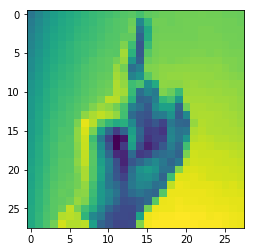

In [5]:
#let see image after its normalized
plt.imshow(X[0].reshape(28,28))

In [6]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [7]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [8]:
# Single Layer CNN
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(24, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
Total params: 695,768
Trainable params: 695,768
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Build model and calculate time
start_time = time.time()
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Instructions for updating:
Use tf.cast instead.
Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 9s 455us/step - loss: 2.4152 - acc: 0.3549 - val_loss: 1.5957 - val_acc: 0.5475
Epoch 2/10
19218/19218 [==============================] - 9s 460us/step - loss: 1.1631 - acc: 0.6896 - val_loss: 0.8462 - val_acc: 0.7936
Epoch 3/10
19218/19218 [==============================] - 9s 458us/step - loss: 0.6957 - acc: 0.8262 - val_loss: 0.5586 - val_acc: 0.8549
Epoch 4/10
19218/19218 [==============================] - 9s 444us/step - loss: 0.4606 - acc: 0.8943 - val_loss: 0.3856 - val_acc: 0.9133
Epoch 5/10
19218/19218 [==============================] - 8s 427us/step - loss: 0.3172 - acc: 0.9329 - val_loss: 0.2555 - val_acc: 0.9494
Epoch 6/10
19218/19218 [==============================] - 8s 438us/step - loss: 0.2258 - acc: 0.9596 - val_loss: 0.1672 - val_acc: 0.9790
Epoch 7/10
19218/19218 [==============================] - 8s 409us/step - l

In [11]:
#Test the model
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5998186685489797
Test accuracy: 0.8248745119910764


In [12]:
# 3 Layer CNN
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(24, activation='softmax'))

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [14]:
#Build model and calculate time
start_time = time.time()
history2 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 14s 719us/step - loss: 2.9558 - acc: 0.1144 - val_loss: 2.1093 - val_acc: 0.3862
Epoch 2/10
19218/19218 [==============================] - 14s 751us/step - loss: 1.7338 - acc: 0.4429 - val_loss: 0.9475 - val_acc: 0.7431
Epoch 3/10
19218/19218 [==============================] - 14s 719us/step - loss: 0.9815 - acc: 0.6724 - val_loss: 0.4896 - val_acc: 0.8719
Epoch 4/10
19218/19218 [==============================] - 14s 710us/step - loss: 0.6448 - acc: 0.7833 - val_loss: 0.2662 - val_acc: 0.9307
Epoch 5/10
19218/19218 [==============================] - 15s 769us/step - loss: 0.4603 - acc: 0.8403 - val_loss: 0.1644 - val_acc: 0.9686
Epoch 6/10
19218/19218 [==============================] - 14s 718us/step - loss: 0.3502 - acc: 0.8793 - val_loss: 0.1099 - val_acc: 0.9846
Epoch 7/10
19218/19218 [==============================] - 15s 768us/step - loss: 0.2663 - acc: 0.9105 - val_loss: 0.0

In [15]:
#Test the model
score2 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.17288390898217934
Test accuracy: 0.9493865030674846


In [16]:
# 4 Layer CNN
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dropout(0.5))

cnn4.add(Dense(24, activation='softmax'))

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [18]:
#Build model and calculate time
start_time = time.time()
history3 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 40s 2ms/step - loss: 3.1145 - acc: 0.0670 - val_loss: 2.5848 - val_acc: 0.2310
Epoch 2/10
19218/19218 [==============================] - 39s 2ms/step - loss: 1.9243 - acc: 0.3839 - val_loss: 0.7653 - val_acc: 0.7823
Epoch 3/10
19218/19218 [==============================] - 38s 2ms/step - loss: 0.8868 - acc: 0.7033 - val_loss: 0.2607 - val_acc: 0.9321
Epoch 4/10
19218/19218 [==============================] - 38s 2ms/step - loss: 0.4742 - acc: 0.8370 - val_loss: 0.1133 - val_acc: 0.9743
Epoch 5/10
19218/19218 [==============================] - 39s 2ms/step - loss: 0.2907 - acc: 0.9002 - val_loss: 0.0341 - val_acc: 0.9945
Epoch 6/10
19218/19218 [==============================] - 38s 2ms/step - loss: 0.1874 - acc: 0.9368 - val_loss: 0.0145 - val_acc: 0.9983
Epoch 7/10
19218/19218 [==============================] - 39s 2ms/step - loss: 0.1388 - acc: 0.9547 - val_loss: 0.0044 - val_acc:

In [19]:
#Test the model
score3 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.13691216259351002
Test accuracy: 0.9629113218070273


In [31]:
# 5 Layer CNN working
cnn5 = Sequential()
cnn5.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.25))

cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn5.add(Dropout(0.25))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.25))

cnn5.add(Flatten())

cnn5.add(Dense(512, activation='relu'))
cnn5.add(Dropout(0.5))

cnn5.add(Dense(128, activation='relu'))
cnn5.add(Dropout(0.5))

cnn5.add(Dense(24, activation='softmax'))

cnn5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [32]:
cnn5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
dropout_36 (Dropout)         (None, 9, 9, 64)          0         
__________

In [33]:
#Build model and calculate time
start_time = time.time()
history4 = cnn5.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 41s 2ms/step - loss: 3.0161 - acc: 0.0868 - val_loss: 2.2612 - val_acc: 0.3328
Epoch 2/10
19218/19218 [==============================] - 44s 2ms/step - loss: 1.9205 - acc: 0.3828 - val_loss: 0.9045 - val_acc: 0.7182
Epoch 3/10
19218/19218 [==============================] - 42s 2ms/step - loss: 1.0270 - acc: 0.6573 - val_loss: 0.3897 - val_acc: 0.8773
Epoch 4/10
19218/19218 [==============================] - 43s 2ms/step - loss: 0.6119 - acc: 0.7904 - val_loss: 0.1818 - val_acc: 0.9563
Epoch 5/10
19218/19218 [==============================] - 42s 2ms/step - loss: 0.3989 - acc: 0.8620 - val_loss: 0.0731 - val_acc: 0.9870
Epoch 6/10
19218/19218 [==============================] - 41s 2ms/step - loss: 0.2771 - acc: 0.9087 - val_loss: 0.0409 - val_acc: 0.9925
Epoch 7/10
19218/19218 [==============================] - 41s 2ms/step - loss: 0.1859 - acc: 0.9385 - val_loss: 0.0286 - val_acc:

In [34]:
#Test the model
score4 = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.19069007955034062
Test accuracy: 0.9559397657557167


In [35]:
# 6 Layer CNN
cnn6 = Sequential()
cnn6.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

cnn6.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Flatten())

cnn6.add(Dense(512, activation='relu'))
cnn6.add(Dropout(0.5))

cnn6.add(Dense(128, activation='relu'))
cnn6.add(Dropout(0.5))

cnn6.add(Dense(24, activation='softmax'))

cnn6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
cnn6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 64)          18496     
__________

In [37]:
#Build model and calculate time
start_time = time.time()
history5 = cnn6.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))
time_arr.append(time.time() - start_time)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 41s 2ms/step - loss: 2.9867 - acc: 0.0937 - val_loss: 2.1122 - val_acc: 0.3761
Epoch 2/10
19218/19218 [==============================] - 40s 2ms/step - loss: 1.7258 - acc: 0.4394 - val_loss: 0.6168 - val_acc: 0.8107
Epoch 3/10
19218/19218 [==============================] - 40s 2ms/step - loss: 0.7983 - acc: 0.7242 - val_loss: 0.2187 - val_acc: 0.9313
Epoch 4/10
19218/19218 [==============================] - 39s 2ms/step - loss: 0.4657 - acc: 0.8395 - val_loss: 0.0987 - val_acc: 0.9755
Epoch 5/10
19218/19218 [==============================] - 40s 2ms/step - loss: 0.2949 - acc: 0.9005 - val_loss: 0.0314 - val_acc: 0.9955
Epoch 6/10
19218/19218 [==============================] - 40s 2ms/step - loss: 0.1973 - acc: 0.9364 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 7/10
19218/19218 [==============================] - 40s 2ms/step - loss: 0.1384 - acc: 0.9548 - val_loss: 0.0069 - val_acc:

In [38]:
#Test the model
score5 = cnn6.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.21267074522741056
Test accuracy: 0.949665365309537


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Check performance for each evaluation by changing history variable
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [ ]:
#initiate arrays to append all of result
array_score = []
array_loss = []
array_time = []

In [ ]:
array_score.append(score1[1])
array_score.append(score2[1])
array_score.append(score3[1])
array_score.append(score4[1])
array_score.append(score5[1])

In [ ]:
array_loss.append(score1[0])
array_loss.append(score2[0])
array_loss.append(score3[0])
array_loss.append(score4[0])
array_loss.append(score5[0])

In [ ]:
array_time.append(time_arr[0])
array_time.append(time_arr[1])
array_time.append(time_arr[2])
array_time.append(time_arr[3])
array_time.append(time_arr[4])

In [ ]:
inc_arr = []

In [ ]:
inc_arr.append(1)
inc_arr.append(2)
inc_arr.append(3)
inc_arr.append(4)

In [ ]:
#draw the accuracy graph
plt.plot(array_score)
plt.title("Accuracy Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('accuracy')
plt.legend(['accuracy'])#,'loss'])
plt.show()

In [ ]:
#draw the loss function graph
plt.plot(array_loss)
plt.title("Loss Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('accuracy')
plt.legend(['loss'])#,'loss'])
plt.show()

In [ ]:
#draw the time graph
plt.plot(array_time)
plt.title("Time Comparison")
plt.xticks(inc_arr)
plt.xlabel('scenarios')
plt.ylabel('seconds')
plt.legend(['time'])#,'loss'])
plt.show()